In [240]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
%matplotlib inline


In [243]:

def load_dataset(file_name, target_column):
    df = pd.read_csv(file_name)
    X = df.drop(target_column, axis = 1)
    y = pd.Series(df[target_column])

    return X, y


def split_to_train_and_test(X, y, test_ratio, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=rand_state)
    return X_train, X_test, y_train, y_test


def scale_features(X_train, scale_type):
    if scale_type == 'standard':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
    elif scale_type == 'minmax':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
    
    return scaler, X_train_scaled



def scale_test_features(X_test, scaler):
    X_test_scaled = scaler.transform(X_test)
    return X_test_scaled
    

    
def train_model(X_train, y_train):
    clf_model = LogisticRegression()
    trained_model = clf_model.fit(X_train, y_train)
    return trained_model


def predict_model(trained_model, X_test):
    predicted_vals = trained_model.predict(X_test)
    return predicted_vals


def evaluate_performance(y_test,y_predicted):
    evaluate_value = metrics.f1_score(y_test, y_predicted, average='micro')
    return evaluate_value

X, y = load_dataset("c:/users/oren keinan/cleanAllStates.csv", "F Scale")


X=X.drop({"Month-Day","Year","State"},axis=1)


X_train, X_test, y_train, y_test = split_to_train_and_test(X,y,0.3,41)

standard_scaler, X_train_standard_scaled = scale_features(X_train,"standard")

X_test_scaled = scale_test_features(X_test, standard_scaler)

trained_standard_model = train_model(X_train_standard_scaled, y_train)

predict_vals = predict_model(trained_standard_model ,X_test_scaled)

y_pred = pd.Series(predict_vals,index=X_test.index)

eva = evaluate_performance(y_test,y_pred)

print(metrics.confusion_matrix(y_test, y_pred))

print("accuracy is:",metrics.accuracy_score(y_test, y_pred))
print("precision is:",metrics.precision_score(y_test, y_pred, average='micro'))
print("recall is:",metrics.recall_score(y_test, y_pred, average='micro'))
print("f1 is:",metrics.f1_score(y_test, y_pred, average='micro'))


[[8335  382    4]
 [2455 1208   20]
 [  43  230   49]]
accuracy is: 0.7537325161087537
precision is: 0.7537325161087537
recall is: 0.7537325161087537
f1 is: 0.7537325161087538
0.7537325161087538


In [244]:
X_train.corr()

,Length(in miles),Width(in feet),Injury,Fatality,Proparty damage (in $)
Length(in miles),1.000000,0.262293,0.108815,0.095000,0.066175
Width(in feet),0.262293,1.000000,0.163529,0.147231,0.153985
Injury,0.108815,0.163529,1.000000,0.751580,0.456277
Fatality,0.095000,0.147231,0.751580,1.000000,0.515528
Proparty damage (in $),0.066175,0.153985,0.456277,0.515528,1.000000


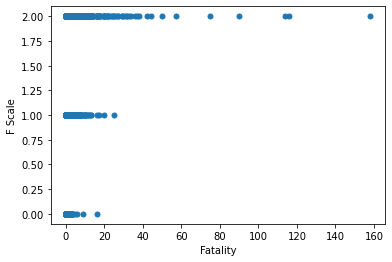

In [87]:
df2 = pd.DataFrame({"Fatality": df["Fatality"], "F Scale": df["F Scale"]})
df2
df2.plot.scatter(x='Fatality',y='F Scale',s=25);

In [7]:
df=pd.read_csv("c:/users/oren keinan/cleanAllStates.csv")

In [158]:
# imports and setup

import numpy as np
import pandas as pd

# sklearn imports
from sklearn import linear_model
from sklearn import metrics

# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit

# visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [161]:
lrm=linear_model.LogisticRegression()
lrm.fit(df_standard_res[["Actual"]],df_standard_res["Predicted"])

LogisticRegression()

In [73]:
df

,Month-Day,Year,F Scale,Length(in miles),Width(in feet),Injury,Fatality,Proparty damage (in $),State
0,Aug. 31,2021,0,1.71,25.0,0,0,10000,alabama
1,Aug. 31,2021,0,0.65,125.0,0,0,100000,alabama
2,Aug. 31,2021,0,0.89,20.0,0,0,20000,alabama
3,Apr. 24,2021,0,0.42,100.0,0,0,25000,alabama
4,Apr. 24,2021,0,4.09,150.0,2,0,100000,alabama
...,...,...,...,...,...,...,...,...,...
42415,May. 28,1953,1,38.20,433.0,0,0,2500,wyoming
42416,May. 08,1952,0,2.00,100.0,0,0,30,wyoming
42417,Jun. 14,1950,0,0.20,10.0,0,0,30,wyoming
42418,Jun. 07,1950,0,0.20,10.0,0,0,30,wyoming
